<a href="https://colab.research.google.com/github/AlexGordeev1661/Fashion-Retail-Sales-Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preparation**

In [1]:
!pip install -q kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/fashion-retail-sales")

print("Path to dataset files:", path)

100%|██████████| 30.9k/30.9k [00:00<00:00, 42.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/fashion-retail-sales/versions/1


In [3]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#Open dovnloaded CSV file
file_path = os.path.join(path, 'Fashion_Retail_Sales.csv')
df = pd.read_csv(file_path)
print(df.head(10))

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   
5                   4080         Onesie                 2914.0    11-12-2022   
6                   4055         Jacket                 2571.0    08-07-2023   
7                   3973       Trousers                 2419.0    10-11-2022   
8                   4044          Jeans                 4771.0    19-05-2023   
9                   4010        Loafers                 4233.0    11-06-2023   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1 

In [5]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
#Checking the number of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

print(df.describe())


Missing Values:
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64
       Customer Reference ID  Purchase Amount (USD)  Review Rating
count            3400.000000            2750.000000    3076.000000
mean             4039.660588             156.709818       2.999057
std                48.122583             419.536669       1.156505
min              3957.000000              10.000000       1.000000
25%              3997.000000              57.000000       2.000000
50%              4040.000000             110.000000       3.000000
75%              4081.000000             155.750000       4.000000
max              4122.000000            4932.000000       5.000000


In [7]:
#convert date purchase column into datetime format

df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format = '%d-%m-%Y')


#drop rows with missing values of the Purchase Amount

df.dropna(subset=['Purchase Amount (USD)'], inplace=True)

In [8]:
df.info(_)

<class 'pandas.core.frame.DataFrame'>
Index: 2750 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  2750 non-null   int64         
 1   Item Purchased         2750 non-null   object        
 2   Purchase Amount (USD)  2750 non-null   float64       
 3   Date Purchase          2750 non-null   datetime64[ns]
 4   Review Rating          2487 non-null   float64       
 5   Payment Method         2750 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 150.4+ KB



Outliers detected using Z-score:
    Purchase Amount (USD)  Purchase_Amount_ZScore
0                  4619.0               10.638168
1                  2456.0                5.481543
2                  2102.0                4.637602
3                  3126.0                7.078833
4                  3003.0                6.785600
5                  2914.0                6.573422
6                  2571.0                5.755705
7                  2419.0                5.393335
8                  4771.0               11.000539
9                  4233.0                9.717938
10                 2356.0                5.243142
11                 4418.0               10.158981
12                 3728.0                8.514011
13                 2130.0                4.704354
14                 2122.0                4.685282
15                 2383.0                5.307510
16                 2895.0                6.528126
17                 2952.0                6.664015
18              

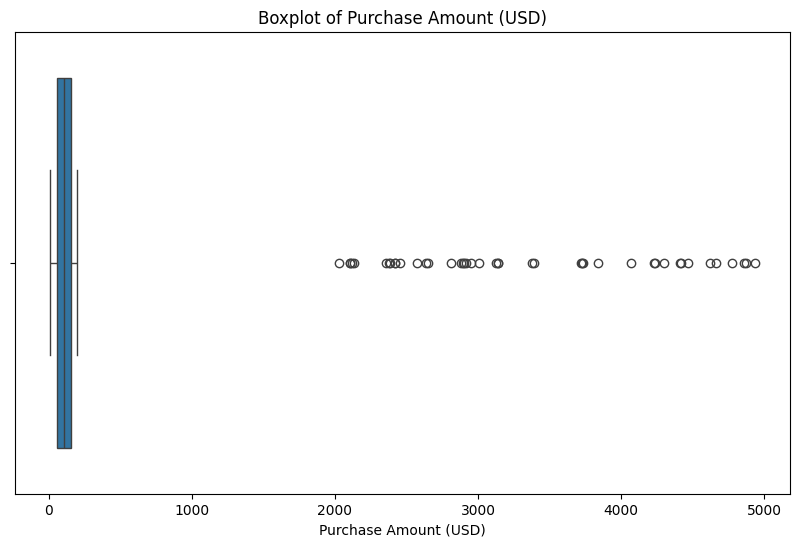

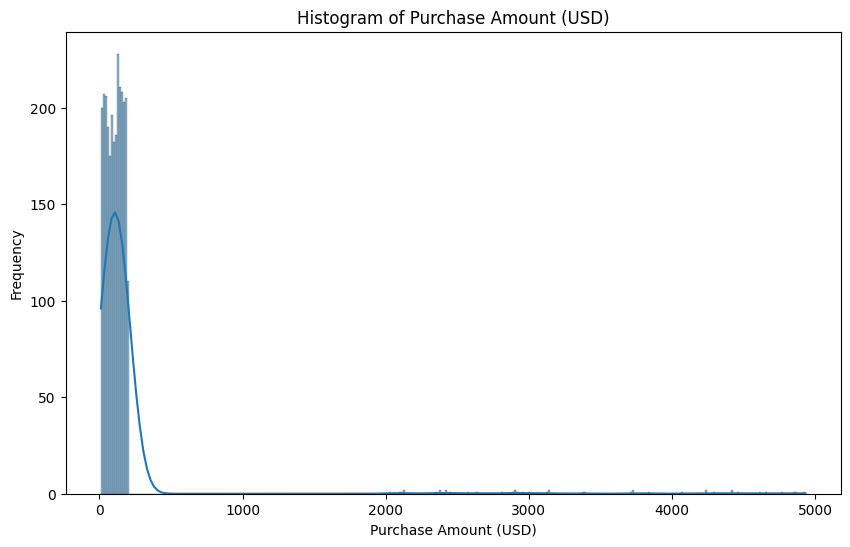

In [9]:
#Outliers detection

import matplotlib.pyplot as plt
# Using Z-score for outlier detection
from scipy.stats import zscore

df['Purchase_Amount_ZScore'] = zscore(df['Purchase Amount (USD)'])

# Define a threshold (e.g., 3 standard deviations)
zscore_threshold = 3

# Identify outliers
outliers_zscore = df[abs(df['Purchase_Amount_ZScore']) > zscore_threshold]

print("\nOutliers detected using Z-score:")
print(outliers_zscore[['Purchase Amount (USD)', 'Purchase_Amount_ZScore']])

# Using IQR for outlier detection
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Purchase Amount (USD)'] < lower_bound) | (df['Purchase Amount (USD)'] > upper_bound)]

print("\nOutliers detected using IQR:")
print(outliers_iqr[['Purchase Amount (USD)']])

# Visualize the distribution to see outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Boxplot of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.title('Histogram of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

In [10]:
total_sales_category = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).reset_index()
print(total_sales_category)

   Item Purchased  Purchase Amount (USD)
0           Tunic                17275.0
1           Jeans                13068.0
2         Pajamas                12798.0
3          Shorts                12702.0
4         Handbag                12668.0
5          Gloves                12330.0
6           Boots                11891.0
7          Poncho                11422.0
8      Flip-Flops                11309.0
9        Slippers                11284.0
10        Loafers                11005.0
11        Sweater                10870.0
12           Belt                10484.0
13         Blouse                10472.0
14    Trench Coat                 9992.0
15         Blazer                 9985.0
16         Hoodie                 9579.0
17         Onesie                 9549.0
18         Romper                 9461.0
19         Wallet                 9372.0
20          Pants                 9295.0
21       Cardigan                 9270.0
22          Scarf                 9175.0
23         Kimon

#**Total Sales By Category**

/tmp/ipython-input-11-2389375458.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_category, x='Category', y='Total Sales', palette='viridis')


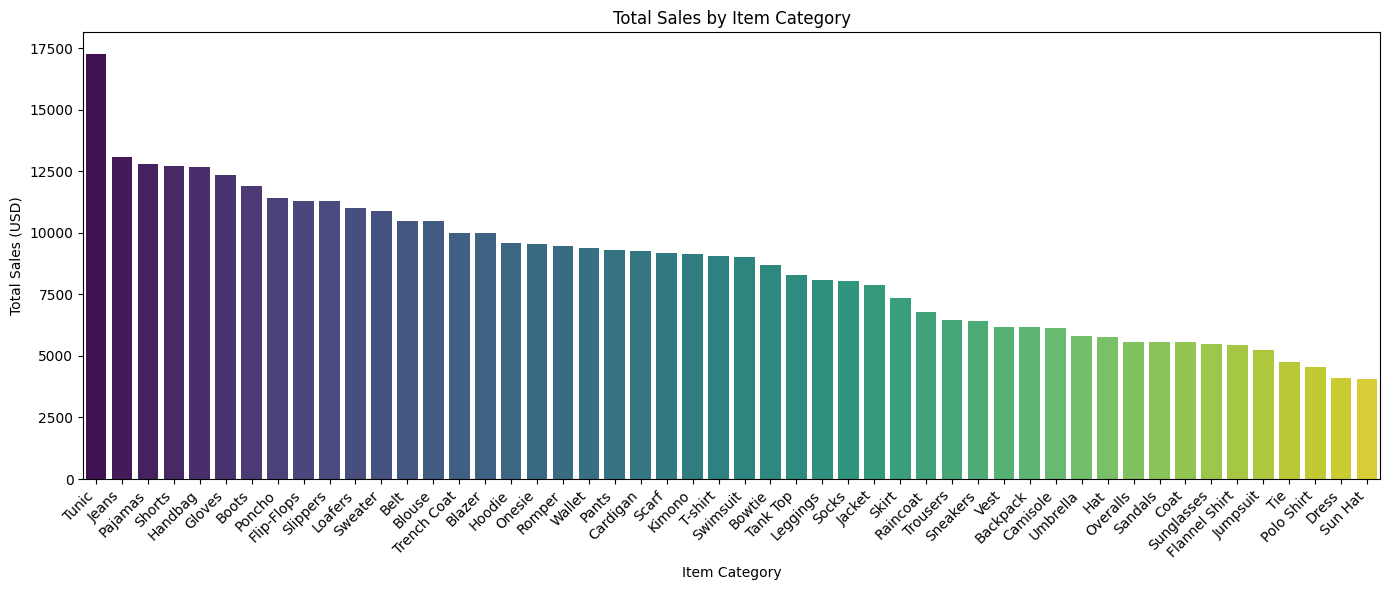

In [11]:
total_sales_category.columns = ['Category', 'Total Sales']


import matplotlib.pyplot as plt
# create a bar chart of total_sales_category
plt.figure(figsize=(14, 6))
sns.barplot(data=total_sales_category, x='Category', y='Total Sales', palette='viridis')
plt.title('Total Sales by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Most Frequently Purchased Items**

/tmp/ipython-input-12-2405384823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_frequency, x='Frequency', y='Item Purchased', palette='viridis')


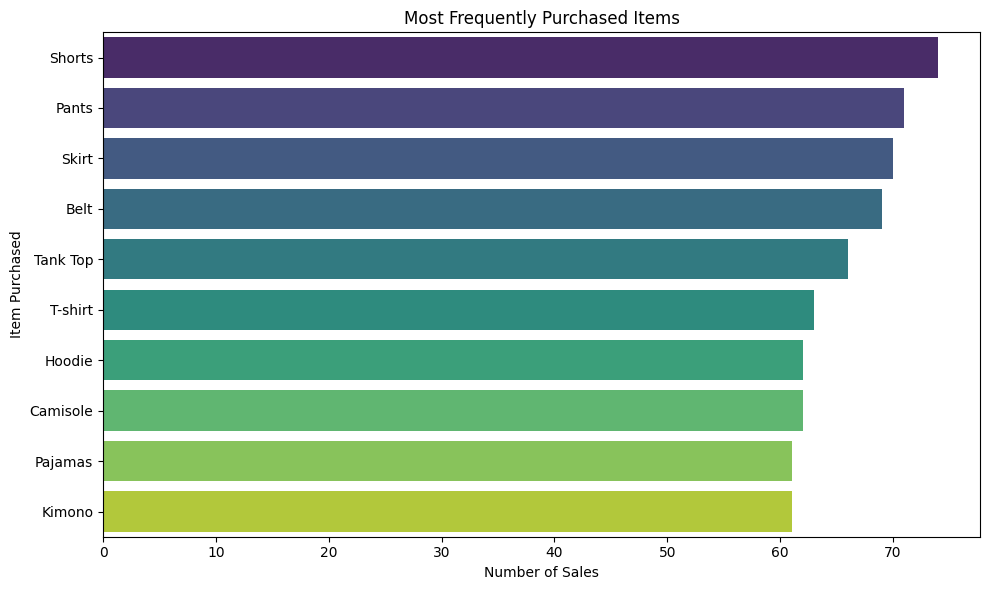

In [12]:

# Analyze the frequency of purchased items per category
item_frequency = df['Item Purchased'].value_counts().head(10).sort_values(ascending=False).reset_index()
item_frequency.columns = ['Item Purchased', 'Frequency']

# Create a bar plot of the most frequently purchased items
plt.figure(figsize=(10, 6))
sns.barplot(data=item_frequency, x='Frequency', y='Item Purchased', palette='viridis')
plt.title('Most Frequently Purchased Items')
plt.ylabel('Item Purchased')
plt.xlabel('Number of Sales')
plt.tight_layout()
plt.show()

#**Mean Purchase Amount Per Item Category**

/tmp/ipython-input-13-2543740306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_purchase_category, x='Category', y='Mean Purchase Amount', palette='viridis')


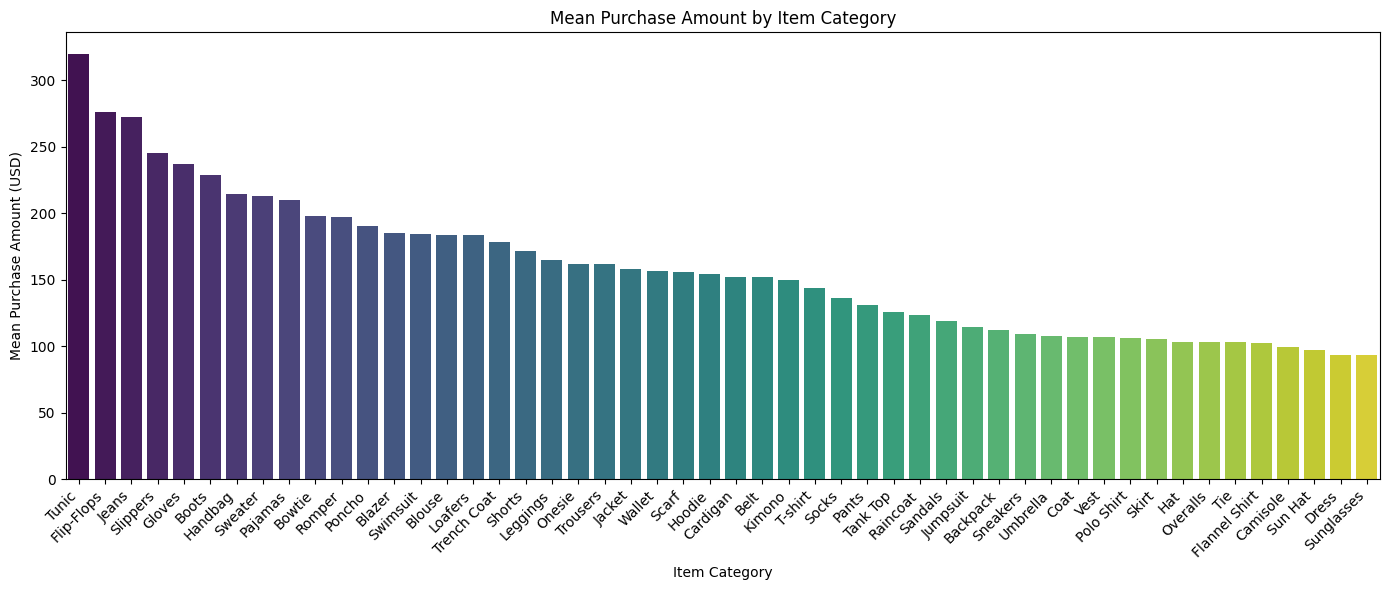

In [13]:

mean_purchase_category = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()
mean_purchase_category.columns = ['Category', 'Mean Purchase Amount']

# Create a bar chart of mean_purchase_category
plt.figure(figsize=(14, 6))
sns.barplot(data=mean_purchase_category, x='Category', y='Mean Purchase Amount', palette='viridis')
plt.title('Mean Purchase Amount by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Mean Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**Seasonal Sales Analysis**

/tmp/ipython-input-14-486126332.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_avg_sales, x='Month', y='Purchase Amount (USD)', palette='viridis')


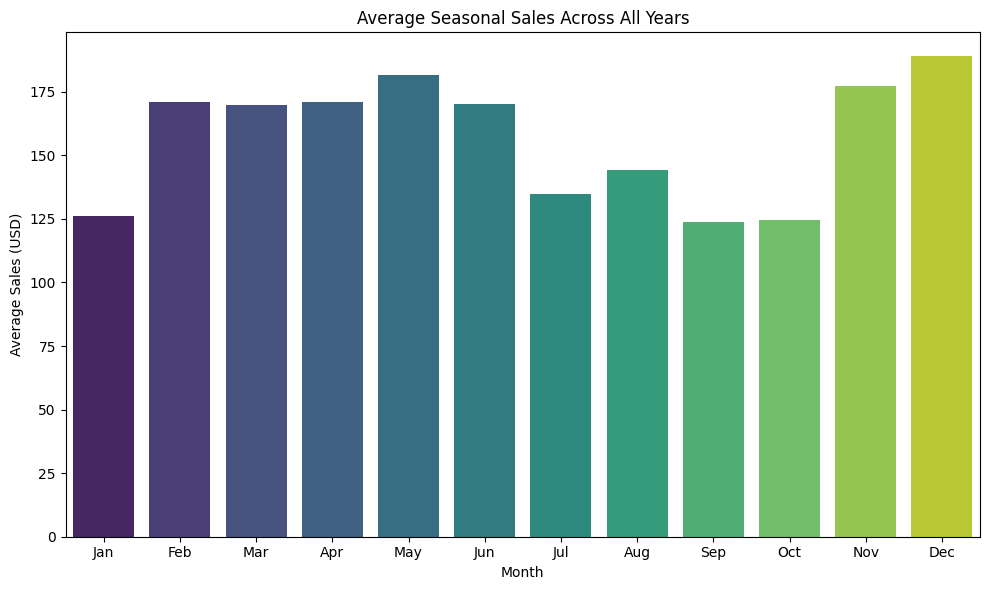

In [14]:


import matplotlib.pyplot as plt
# Extract month and year
df['Month'] = df['Date Purchase'].dt.month
df['Year'] = df['Date Purchase'].dt.year

# Group by year and month and sum the purchase amounts
monthly_sales = df.groupby(['Year', 'Month'])['Purchase Amount (USD)'].sum().reset_index()

# Group by month and calculate the mean purchase amount for each month across all years
seasonal_avg_sales = df.groupby('Month')['Purchase Amount (USD)'].mean().reset_index()

# Create a bar plot for average sales per month
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg_sales, x='Month', y='Purchase Amount (USD)', palette='viridis')
plt.title('Average Seasonal Sales Across All Years')
plt.xlabel('Month')
plt.ylabel('Average Sales (USD)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-986347082.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_avg_sales_season, x='Season', y='Purchase Amount (USD)', palette='viridis')


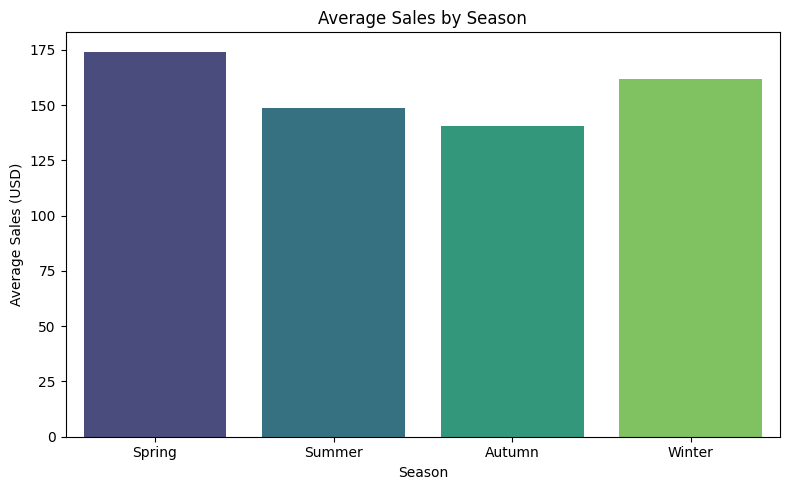

In [15]:


import pandas as pd
import matplotlib.pyplot as plt
# Combine months into seasons
def get_season(month):
  if month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Winter'

df['Season'] = df['Month'].apply(get_season)

# Group by season and calculate the mean purchase amount
seasonal_avg_sales_season = df.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()

# Define the order of seasons for plotting
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonal_avg_sales_season['Season'] = pd.Categorical(seasonal_avg_sales_season['Season'], categories=season_order, ordered=True)
seasonal_avg_sales_season = seasonal_avg_sales_season.sort_values('Season')

# Create a bar plot for average sales per season
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_avg_sales_season, x='Season', y='Purchase Amount (USD)', palette='viridis')
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales (USD)')
plt.tight_layout()
plt.show()

# Group by year and season and sum the purchase amounts for a yearly seasonal breakdown
yearly_seasonal_sales = df.groupby(['Year', 'Season'])['Purchase Amount (USD)'].sum().reset_index()

# Sort by year and then by the custom season order
yearly_seasonal_sales['Season'] = pd.Categorical(yearly_seasonal_sales['Season'], categories=season_order, ordered=True)
yearly_seasonal_sales = yearly_seasonal_sales.sort_values(['Year', 'Season'])

#**Payment Method**

/tmp/ipython-input-16-3173712554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method, x='Payment Method', y='Total Sales', palette='viridis')


Text(0, 0.5, 'Total Sales (USD)')

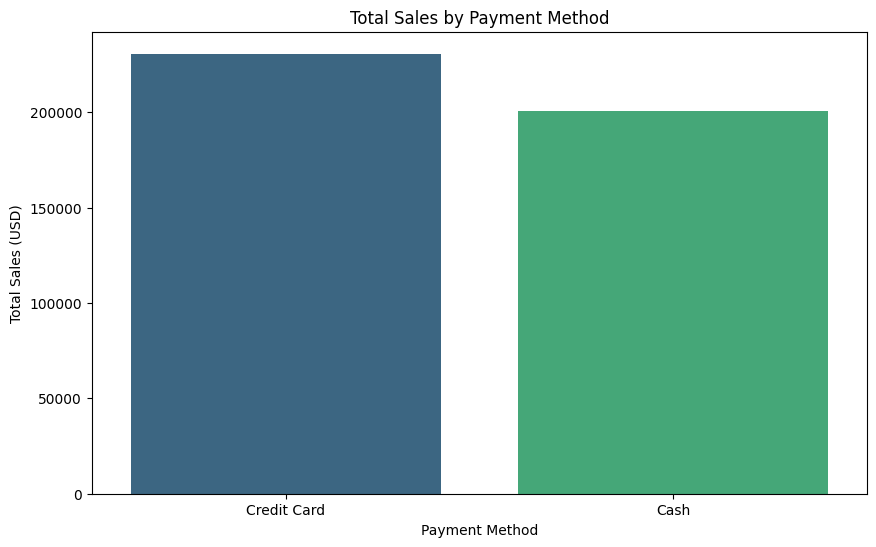

In [16]:
payment_method=df.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending=False).reset_index()
payment_method.columns = ['Payment Method', 'Total Sales']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_method, x='Payment Method', y='Total Sales', palette='viridis')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales (USD)')

